In [2]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import mixture

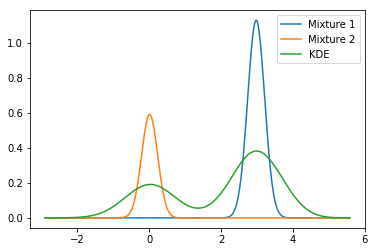

In [3]:
#fit mixture model
obs = np.concatenate((np.random.normal(loc=0.0, scale=0.5, size=100), np.random.normal(loc=3.0, scale=.5, size=200)))
g = mixture.GaussianMixture(n_components=2)
g.fit(obs.reshape(300,1))

#do kernel estimation
dens = sm.nonparametric.KDEUnivariate(obs)
dens.fit()

#draw mixture model
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0])
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0])

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.show()

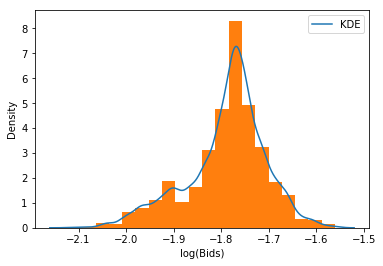

<Figure size 432x288 with 0 Axes>

In [4]:
#load data
data = pd.read_csv('data/milk_join.csv')
data.set_index('ROW')
bids = np.array(data['WW'].dropna())

#log transformation
lbids = np.log(bids[ (.12<=bids) & (bids<=.21) ])

#do kernel density estimation
dens = sm.nonparametric.KDEUnivariate(lbids)
dens.fit()

plt.plot(dens.support, dens.density, label='KDE')
plt.hist(lbids,20,density=True)
plt.xlabel('log(Bids)')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.savefig('bids_density.png')

Means: [-1.75706761 -1.90132556]
Var: [0.00295696 0.0047487 ]
Weights: [0.78077578 0.21922422]


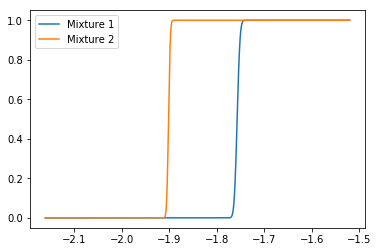

In [5]:
#fit mixture model
g = mixture.GaussianMixture(n_components=2)
g.fit(lbids.reshape(lbids.shape[0],1))

print 'Means: %s'%g.means_[:,0]
print 'Var: %s'%g.covariances_[:,0,0]
print 'Weights: %s'%g.weights_

#first see stocahstic dominance
comp1_cdf = stats.norm.cdf(dens.support,g.means_[0,0],g.covariances_[1,0])
comp2_cdf = stats.norm.cdf(dens.support,g.means_[1,0],g.covariances_[0,0])

plt.plot(dens.support, comp1_cdf, label='Mixture 1')
plt.plot(dens.support, comp2_cdf, label='Mixture 2')
plt.legend()
plt.show()

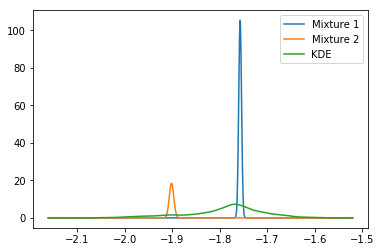

In [6]:
#graph kernel with mixture components
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0])
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0])

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.show()